## Esame Metodi Numerici  4 Luglio 2024 - Turno II Ore 12,30

# Esercizio 1

Si considerino i due sistemi lineari:

     A  x = b 

    A1 x1 = b1

dove A, A1 sono le matrici dei coefficienti, b e b1 sono i termini noti, ed x ed x1 sono i vettori incogniti da determinare.
I dati di questi due sistemi lineari sono contenuti nel file **testII.mat**.


- Si risolva ciascuno dei sistemi lineari assegnati  utilizzando il metodo più adatto in base alle caratteristiche della matrice dei coefficienti, giustificando teoricamente le scelte effettuate.
                                      **punti 6**

Per il sistema A1 x1= b1, , aggiungere una perturbazione dello 0.1% sulla componente 1-esima del termine noto, e risolvere il sistema con termine noto perturbato. Calcolare quindi  l'errore relativo sulla soluzione e l'errore relativo sui dati e giustificare i risultati alla luce della teoria.
                                      **punti 2**


Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('testII')``

``A=dati["A"] ``

``A=A.astype(float)``

`` b=dati["b"] ``

`` b=b.astype(float)``

``A1=dati["A1"] ``

``A1=A1.astype(float)``

`` b1=dati["b1"] ``

`` b1=b1.astype(float)``

In [1]:
from scipy.io import loadmat
import numpy as np
from SolveTriangular import Lsolve, Usolve
import scipy as sp

dati = loadmat('testII')
A=dati["A"] 
A=A.astype(float)
b=dati["b"]
b=b.astype(float)
A1=dati["A1"] 
A1=A1.astype(float)
b1=dati["b1"]
b1=b1.astype(float)

In [2]:
# punto 1

def mostra_caratteristiche(A):
    print("- dimensione:", A.shape)
    quadrata=A.shape[0]==A.shape[1]
    print("- quadrata:", quadrata)
    print("- condizionamento:", np.linalg.cond(A))
    if quadrata:
        print("- densità:", np.count_nonzero(A)/np.prod(A.shape))
        print("- simmetrica:", np.all(A.T==A))
        print("- definita positiva:", np.all(np.linalg.eigvals(A)>0))
        print("- a diagonale strettamente dominante:", np.all(2*np.abs(A)>np.sum(np.diag(np.abs(A))))) # |Aii|>sum_j!=i|Aij| => 2|Aii|>sum_j|Aij|
    else:
        print("- rango massimo:", np.min(A.shape) == np.linalg.matrix_rank(A))
    print()

print("Matrice A")
mostra_caratteristiche(A) # quadrata, piccola, densa, ben condizionata, simmetrica, definita positiva
print("Matrice A1")
mostra_caratteristiche(A1) # sistema sovradeterminato (m>n), mal condizionata, rango non massimo

# in base alle caratteristiche delle matrici, decido di utilizzare i seguenti metodi di risoluzione:
# - Fattorizzazione di Cholesky per A: tra le tre fattorizzazioni possibili (LU, QR e Cholesky), quando la matrice è simmetrica e definita positiva si usa Cholesky.
# - SVDLS per A1: quando la matrice rappresenta un sistema sovradeterminato e non ha rango massimo, questo metodo è l'unica opzione disponibile.

def cholesky(A, b):
    L = sp.linalg.cholesky(A, lower=True)
    U = L.T
    x, flag = Lsolve(L, b)
    if flag == 0:
        return Usolve(U, x)[0]
    return None

def SVDLS(A,b):
    m,n=A.shape  #numero di righe e  numero di colonne di A
    U,s,VT=sp.linalg.svd(A)  
    
    V=VT.T
    thresh=np.spacing(1)*m*s[0] ##Calcolo del rango della matrice, numero dei valori singolari maggiori di una soglia
    k=np.count_nonzero(s>thresh)
    
    d=U.T@b
    d1=d[:k].reshape((k,1))
    s1=s[:k].reshape((k,1))
    
    c=d1/s1 
    x=V[:,:k]@c 
    residuo=np.linalg.norm(d[k:])**2 
    return x,residuo

x = cholesky(A, b)
x1, _ = SVDLS(A1, b1)

print("Soluzione Ax=b:", x)
print("Soluzione A1x1=b1:", x1)

Matrice A
- dimensione: (10, 10)
- quadrata: True
- condizionamento: 12.814544599567935
- densità: 0.96
- simmetrica: True
- definita positiva: True
- a diagonale strettamente dominante: False

Matrice A1
- dimensione: (20, 15)
- quadrata: False
- condizionamento: 5.697438059606206e+16
- rango massimo: False

Soluzione Ax=b: [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
Soluzione A1x1=b1: [[0.5210993 ]
 [1.25827182]
 [1.27889527]
 [0.46087355]
 [0.89024294]
 [1.04762977]
 [0.29616227]
 [0.59585228]
 [1.13383321]
 [0.94430646]
 [1.32127485]
 [0.97301581]
 [0.15568769]
 [0.79644108]
 [1.09968922]]


In [3]:
# punto 2
# bb1 = b1 + perturbazione
bb1 = b1.copy()
bb1[1] += bb1[1]/1000

err = lambda x, expected: np.linalg.norm(x-expected)/np.linalg.norm(x)
print("Errore dati:", err(bb1, b1))
xx1, _ = SVDLS(A1, bb1) # xx1 = soluzione con b1 perturbato
print("Errore soluzione:", err(xx1, x1))

# Nonostante la matrice A1 abbia un indice di condizionamento molto elevato (5.697e+16), che quindi dovrebbe portare ad un grande aumento dell'errore per una piccola perturbazione sui dati, il metodo
# SVDLS riesce a mantenere un errore basso anche in queste condizioni; per questo è consigliato, oltre che per quando la matrice non ha rango massimo, per quando la matrice ha un cattivo indice 
# di condizionamento.

Errore dati: 0.0005097836518342455
Errore soluzione: 0.0033517497436717524


- Dato il sistema lineare 
A3 x3 = b3
dove 

A3=np.array([[8.0,0,1,1],[0,0.8,1,0],[1,1,2,0],[1,0,0.0,2.0]])
b3= np.array([10.0, 1.8,  4.0, 3.0])

- Verificare senza calcolare il raggio spettrale della matrice di iterazione che il metodo di Gauss-Seidel converge, richiamando il teorema che garantisce la convergenza di Gauss-Seidel per classi particolari di 
matrici     **punti[1]**.
- Implementare il metodo di Gauss-Seidel  e risolvere il sistema lineare A3 x3= b3  **punti[3]**.

Totale **Punti 12**

In [4]:
# punto 1

A3=np.array([[8.0,0,1,1],[0,0.8,1,0],[1,1,2,0],[1,0,0.0,2.0]])
b3= np.array([10.0, 1.8, 4.0, 3.0])

# mostriamo le caratteristiche di A3
print("Matrice A3")
mostra_caratteristiche(A3)

# essendo A3 simmetrica e definita positiva, il metodo di Gauss-Seidel converge a soluzione

Matrice A3
- dimensione: (4, 4)
- quadrata: True
- condizionamento: 41.85857755643037
- densità: 0.625
- simmetrica: True
- definita positiva: True
- a diagonale strettamente dominante: False



In [5]:
# punto 2
def gauss_seidel(A,b,x0,toll,it_max):
    errore=1000
    d=np.diag(A)
    D=np.diag(d)
    E=np.tril(A, -1)
    F=np.triu(A, 1)
    M=D+E
    N=-F
    invM=np.linalg.inv(M)
    T=invM@N
    autovalori=np.linalg.eigvals(T)
    raggiospettrale=np.max(np.abs(autovalori)) 
    print("raggio spettrale Gauss-Seidel ",raggiospettrale)
    it=0
    er_vet=[]
    while it<it_max and errore>toll:
        x, _=Lsolve(M, b+N@x0) 
        errore=np.linalg.norm(x-x0)/np.linalg.norm(x)
        er_vet.append(errore)
        x0=x.copy()
        it=it+1
    return x,it,er_vet

b3 = b3.reshape(-1, 1)
x0 = np.zeros_like(b3) # iterato iniziale [0, 0, ..., 0]^T
toll=1e-10
it_max = 1000
x3, it, err = gauss_seidel(A3, b3, x0, toll, it_max)
print("Soluzione A3x3 = b3:", x3)

raggio spettrale Gauss-Seidel  0.6936887195995491
Soluzione A3x3 = b3: [[1.]
 [1.]
 [1.]
 [1.]]


## Esercizio 2

Per ogni $k \in N$ l'equazione di II grado $x^2+(4^{2k}-2^{-2k})x-4^{2k}2^{-2k}=0 $ ha come soluzioni esatte $x_1=-4^{2k}$,$x_2=2^{-2k}$,

Scrivere lo script python in cui
- si implementa la formula risolutiva delle equazioni di II grado per calcolare le  due soluzioni per $k$ che  assume valori interi tra 4 e 12;  [**Punti 2**]
- per entrambe le soluzioni, si calcola l'errore relativo commesso al variare di k che assume valori interi tra 4 e 12;   [**Punti 1**]
- si rappresentano in un grafico gli andamenti dei due errori relativi calcolati nel punto precedente; [**Punti 1**]
- osservando i grafici ottenuti, si dica se le formule utilizzate per calcolare le due soluzioni hanno dato luogo ad algoritmi stabili, motivando opportunamente la risposta alla luce della teoria.   [**Punti 4**]

- proporre ed implementare un algoritmo alternativo stabile per il calcolo della soluzione per cui la formula risolutiva classica si è dimostrata non essere stabile. [**Punti 2**]

In [6]:
import numpy as np
import matplotlib.pyplot as plt

a: 1
b: [6.55359961e+04 1.04857600e+06 1.67772160e+07 2.68435456e+08
 4.29496730e+09 6.87194767e+10 1.09951163e+12 1.75921860e+13
 2.81474977e+14]
c: [-2.5600000e+02 -1.0240000e+03 -4.0960000e+03 -1.6384000e+04
 -6.5536000e+04 -2.6214400e+05 -1.0485760e+06 -4.1943040e+06
 -1.6777216e+07]


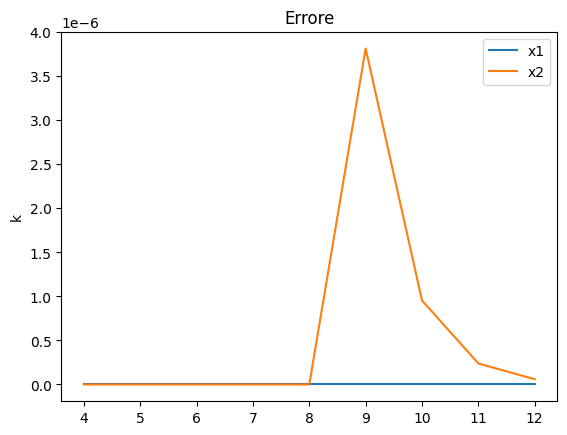

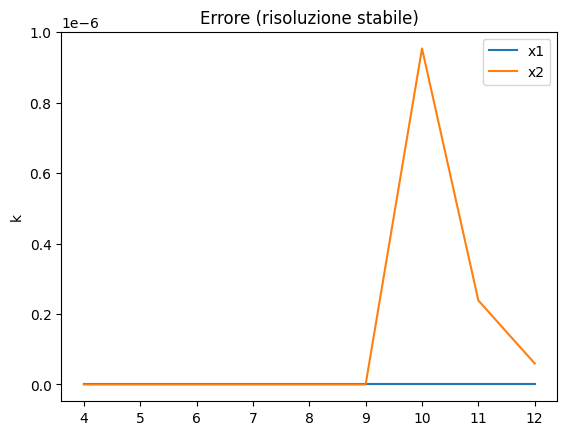

In [18]:
k = np.arange(4, 13)
x1_esatta = -4.0**(2*k)
x2_esatta = 2.0**(-2*k)

# punto 1
risolvi = lambda a, b, c: ((-b -np.sqrt(b**2 -4*a*c))/(2*a), (-b +np.sqrt(b**2 -4*a*c))/(2*a))

a = 1
b = 4.0**(2*k) - 2.0**(-2*k)
c = -4.0**(2*k)*2.0**(-2*k)

print("a:", a)
print("b:", b)
print("c:", c)

x1, x2 = risolvi(a, b, c)

# punto 2
err = lambda x, expected: np.abs(x-expected)/np.where(x!=0, np.abs(x), 1)
err_x1 = err(x1, x1_esatta)
err_x2 = err(x2, x2_esatta)

# punto 3
plt.title("Errore")
plt.ylabel("k")
plt.plot(k, err_x1, label="x1")
plt.plot(k, err_x2, label="x2")
plt.legend()
plt.show()

# punto 4
# la formula per x2 non è stabile perchè, per certi valori di k, -b e +sqrt(b**2 -4*a*c) sono simili in modulo ma di segno opposto, portarndo ad errori nella soluzione. Per risolvere questo problema
# si può fattorizzare la radice portandola al denominatore (si moltiplica per (sqrt(b**2 -4*a*c) + b)/(sqrt(b**2 -4*a*c) + b)).

# punto 5
risolvi_stabile = lambda a, b, c: ((-b -np.sqrt(b**2 -4*a*c))/(2*a), ((b**2 -4*a*c) - b**2)/(2*a*(np.sqrt(b**2 -4*a*c) + b)))

x1_s, x2_s = risolvi_stabile(a, b, c)
err_x1_s = err(x1_s, x1_esatta)
err_x2_s = err(x2_s, x2_esatta)

plt.title("Errore (risoluzione stabile)")
plt.ylabel("k")
plt.plot(k, err_x1_s, label="x1")
plt.plot(k, err_x2_s, label="x2")
plt.legend()
plt.show()

- Ricavavare la formula che quantifica l'indice di condizionamento del problema di valutare una funzione $f:R \rightarrow R$ in un punto $x \in R$ [**punti 3**]

In [19]:
# punto 6
# utilizzo la libreria sympy per il calcolo della derivata automatica, che richiede la riscrittura della funzione in forma simbolica
import sympy as sym
import numpy as np

# calcolo dell'indice di condizionamento di una funzione in x a partire dalla sua versione simbolica
def condizionamento(fs, xs, x):
    dfs = sym.diff(fs, xs, 1) # calcolo la derivata prima simbolica
    print("f'(x):", dfs)
    
    f = sym.lambdify(xs, fs, np) # rendo numerica la funzione
    df = sym.lambdify(xs, dfs, np) # rendo numerica la derivata

    return np.abs(x*df(x)/f(x)) # K(f(x)) = |f'(x)/f(x)|

xs = sym.symbols("x")
fs = sym.cos(xs)/2
x = 3.14
print("Indice di condizionamento K(f(x)):", condizionamento(fs, xs, x))

f'(x): -sin(x)/2
Indice di condizionamento K(f(x)): 0.005000936500318681


## Domande Intelligenza Artificiale
**NB: Ogni risposta esatta:  +0.5 punti, ogni risposta errata: -0.5 punti. La mancanza di risposta:  0 punti**

Domande a risposta multipla

**1** 
Quale delle seguenti affermazioni è FALSA riguardo alle reti MLP (Multilayer Perceptron)? C

- Le reti MLP sono composte da uno o più strati nascosti di neuroni.
- Le reti MLP utilizzano una funzione di attivazione non lineare per introdurre una non linearità nel modello.

- Le reti MLP sono in grado di apprendere solo relazioni lineari tra i dati di input e output.

- Le reti MLP possono essere utilizzate per risolvere una vasta gamma di problemi di apprendimento automatico, tra cui la classificazione e la regressione.

**2.**  Quale delle seguenti affermazioni è la definizione CORRETTA di learning rate nel training di una rete neurale? B

A) Il numero di volte in cui l'intero set di dati viene utilizzato durante il training.

B) Un parametro che controlla la velocità con cui i pesi della rete vengono aggiornati durante il training.

C) Il numero di neuroni presenti nello strato di output della rete.

D) La funzione di attivazione utilizzata dai neuroni della rete.ressione

**3.**  
Quale tra le seguenti affermazioni descrive meglio il compito della funzione di attivazione nel training di una rete neurale? B

- Trasformare i dati di input in un formato compatibile con la rete neurale

- Introdurre una non linearità nel flusso di informazioni della rete

- Calcolare l'errore tra l'output previsto e quello effettivo

- Aggiornare i pesi delle connessioni tra i neuroni softmax


**4.** Quale delle seguenti definizioni descrive meglio un'epoca nel training di una rete neurale?
- Il numero di volte in cui viene aggiornato un singolo peso nella rete
- Il tempo impiegato per completare un ciclo di forward pass e backward propagation
- Il numero di volte in cui l'intero set di dati di training viene esposto alla rete
- Una misura della complessità del modello di rete neurale


**5.** Quale tra le seguenti affermazioni è FALSA riguardo alla suddivisione del dataset in un contesto di machine learning? C

- La suddivisione del dataset in set di training, validation e test è fondamentale per valutare correttamente le prestazioni di un modello di machine learning.
- Il set di training viene utilizzato per addestrare il modello sui dati.
- Il set di validation viene utilizzato per trovare le etichette dei dati di input
- Il set di test viene utilizzato per valutare le prestazioni finali del modello su dati che non sono stati utilizzati per il training o la validation.


**Domande aperte**

**6. Descrivi in cosa consiste la fase di forward-propagation e back-propagation nell'ambito del training di una rete neurale, soffermandoti sull'importanza dell'algoritmo di backpropagation** per il calcolo delle derivate parziali della funzione costo rispetto ai pesi di tutti i layer **[punti 1.5]**

**7** Ricavare la formula di aggiornamento dei pesi mediante algoritmo di backpropagation nel caso di una rete MLP formata da un nodo di input, 2 layer nascosti ciascuno dei quali costituito da un solo neurone ed un nodo di output.   **[punti: 3]**

**6:** La fase di forward-propagation consiste nel dare in input alla rete i dati per ottenere un risultato, così da poter calcolare l'errore tramite la funzione costo. La fase di back-propagation consiste invece nel calcolare e riassegnare i valori dei pesi in base al risultato della funzione costo: in particolare, siccome quest'ultima va minimizzata in quanto rappresenta l'errore, per ogni neurone si vuole adattare il peso in base al valore della derivata parziale della funzione costo rispetto ad esso, cercando di andare nella direzione opposta al gradiente per avere massima decrescita.

**7:** consideriamo quindi la rete:
- xi: valore del nodo al livello i (i=0: layer input, i=3: layer output)
- wi: peso tra nodo al livello i e livello i-1
- L: loss function

$$\delta_1 = \frac{\delta L}{\delta w_3}$$
$$\delta_2 = \delta_1 w_2$$
$$\delta_3 = \delta_2 w_3$$

Portando quindi i nuovi pesi a:
$$w_1 = \delta_1 w_1$$
$$w_2 = \delta_2 w_2$$
$$w_3 = \delta_3 w_3$$